<a href="https://colab.research.google.com/github/PonchaCape/DS-school-homework/blob/main/%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В данном ноутбуке в качестве домашнего задания я буду решать задачу классификации, данные по которой представлены на сайте Kaggle по ссылке https://www.kaggle.com/sid321axn/thoraric-surgery

В этой задаче необходимо определить, какой диагноз будет поставлен пациенту. Всего в наборе данных 8 классов - то есть 8 возможных диагнозов. Полное описание датасета можно найти на сайте по вышеуказанной ссылке.

##Подключение библиотек

Начнём с импорта необходимых для работы библиотек

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

##Загрузка данных

Загружаем наш датасет. Я поместил его в репозиторий Github, и использую pandas для чтения файла по ссылке

In [45]:
Raw_dataset = pd.read_csv("https://github.com/PonchaCape/DS-school-homework/raw/main/Big%20HW%202/ThoraricSurgery.csv")

Вывожу таблицу, взглянем на данные.

In [46]:
Raw_dataset.head()


,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


##Анализ и очистка данных

Видим множество зашифрованных столбцов. По этим данным есть описание данных на английском языке.
1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F) 

Расшифруем названия столбцов для удобства анализа

In [47]:
Raw_dataset.columns = ['id', 
                       'Diagnosis', 
                       'Forced_vital_capacity', 
                       'FEV1', 
                       'Performance_status', 
                       'Pain', 
                       'Haemoptysis',
                       'Dyspnoea',
                       'Cough',
                       'Weakness',
                       'Size_of_tumor',
                       'diabetes_mellitus',
                       'MI_to_6months',
                       'PAD',
                       'Smoking',
                       'Asthma',
                       'Age',
                       'Risk1Y']
Raw_dataset.head()

,id,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


Сразу же бросается в глаза, что большую часть данных составляют категориальные данные. В частности, все значения T,F (True,False) - столбцы, обозначающие был ли признак в названии столбца у пациента перед операцией или его не наблюдалось. Целевая переменная тоже содержит категориальные значения. Все значения T и F мы переведём в числовые - 1 и 0 соответственно.

In [48]:
Dataset = Raw_dataset.replace({'F':0, 'T':1})
Dataset.head()

,id,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1


Посмотрим теперь на статистику по датасету

In [49]:
Dataset.describe()

,id,Forced_vital_capacity,FEV1,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,0.065957,0.144681,0.065957,0.687234,0.165957,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.871395,11.767857,0.248472,0.352154,0.248472,0.464114,0.372439,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.160000,2.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.807500,3.080000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,6.300000,86.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


Несколько обобщений, которые даёт нам эта статистика:

Разобраны данные по 470 пациентам, возраст которых варьируется от 21 до 87 лет, при этом подавляющая часть старше 50 лет. 

Пациентов с астмой незначительное количество, как и пациентов с заболеванием периферических артерий (PAD). Что касается риска смерти - менее 15% пациентов погибли в течении года после операции (Risk1Y).

Достаточно высокий процент курящих пациентов. Приблизительно у 2/3 всех пациентов был кашель перед операцией (cough).

Теперь взглянем на наличие пропусков в данных и на типы данных в столбцах.

In [50]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     470 non-null    int64  
 1   Diagnosis              470 non-null    object 
 2   Forced_vital_capacity  470 non-null    float64
 3   FEV1                   470 non-null    float64
 4   Performance_status     470 non-null    object 
 5   Pain                   470 non-null    int64  
 6   Haemoptysis            470 non-null    int64  
 7   Dyspnoea               470 non-null    int64  
 8   Cough                  470 non-null    int64  
 9   Weakness               470 non-null    int64  
 10  Size_of_tumor          470 non-null    object 
 11  diabetes_mellitus      470 non-null    int64  
 12  MI_to_6months          470 non-null    int64  
 13  PAD                    470 non-null    int64  
 14  Smoking                470 non-null    int64  
 15  Asthma

Пропусков нет. 

У нас осталось 3 столбца (Целевой столбец Diagnosis, Performance_status, Size_of_tumor) с категориальными данными. Мы преобразуем их в численные, используя метод библиотеки sklearn LabelEncoder.

Столбец id содержит уникальные значения. Так как он очевидно бесполезен для обучения нашей модели, мы его удалим.

In [51]:
Dataset = Dataset.drop(columns='id')

In [52]:
from sklearn.preprocessing import LabelEncoder
for categorical_column in ['Diagnosis', 'Performance_status', 'Size_of_tumor']:
  Dataset[categorical_column] = LabelEncoder().fit_transform(Dataset[categorical_column])
Dataset.head()

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


Теперь датасет содержит только численные значения! Посмотрим на гистограммы распределения значений в столбцах.

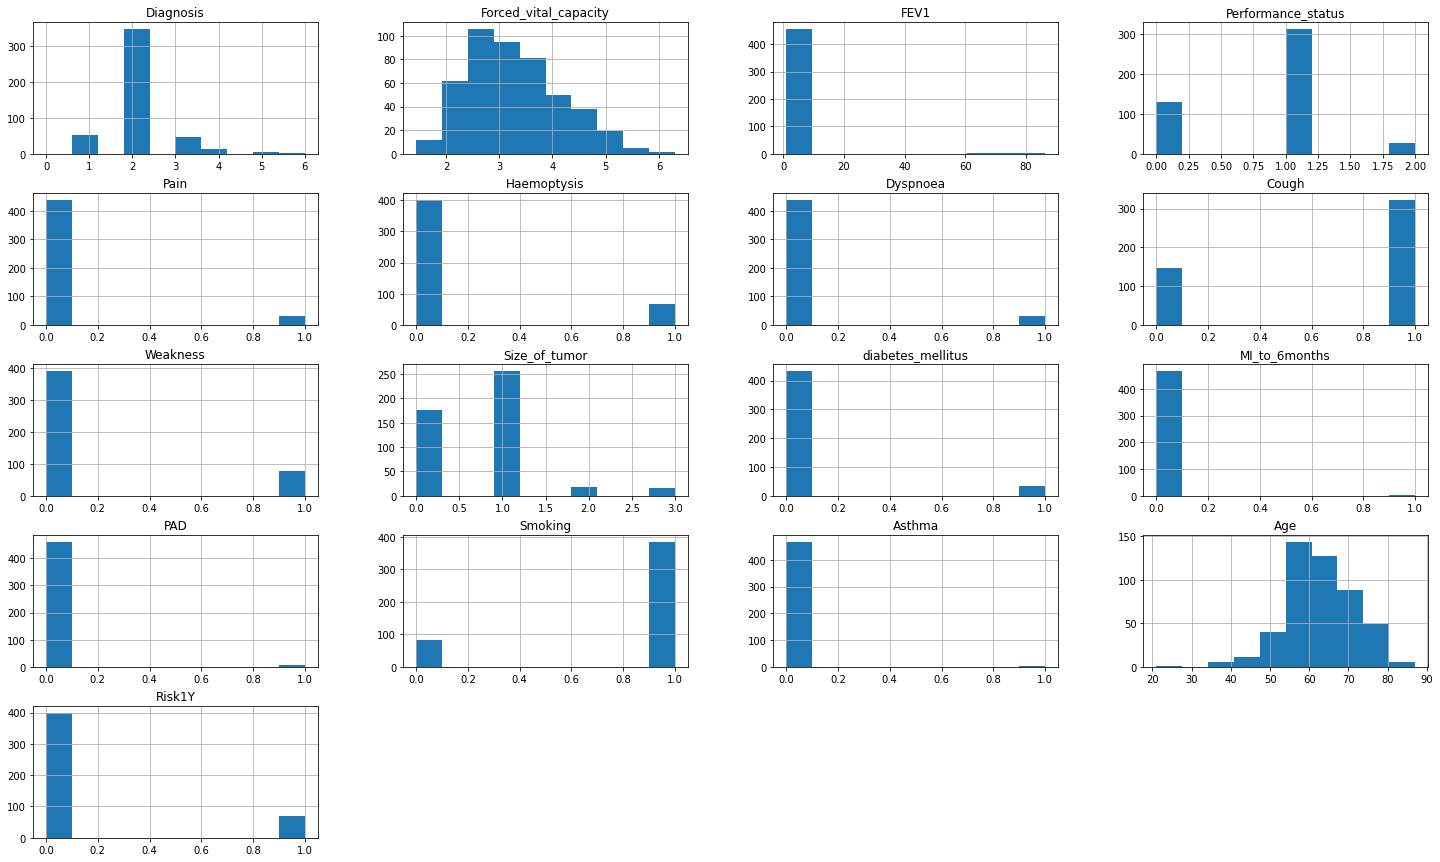

In [53]:
Dataset.hist(figsize= (25,15))
plt.show()

Практически все значения плохо сбалансированы. Возможно, имеет смысл использовать oversamling и добавить в датасет значений меньших классов, так как помимо несбалансированности наш датасет отличается малым количеством наблюдений. Но перед тем, как изменить датасет, посмотрим, как с ним справится алгоритм в текущем состоянии. В следующей ячейке я проверю распределение целевых классов в цифрах.

2    349
1     52
3     47
4     15
5      4
6      2
0      1
Name: Diagnosis, dtype: int64 



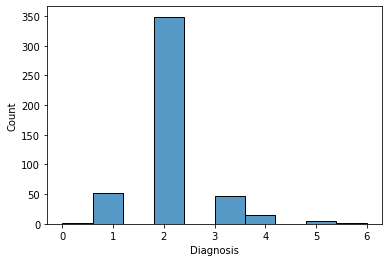

In [54]:
print(Dataset.Diagnosis.value_counts(), '\n')
sns.histplot(data = Dataset.Diagnosis)

С классами 0, 6 и 5 всё совсем плохо, их модель не сможет распознать.

У класса 4 тоже очень мало наблюдений. 

Класс 2 содержит около 75% всех случаев.

Классы 1 и 3 на порядок больше классов 4,5,6,0, и на порядок меньше класса 2.

Далее я возьму срезы по минорным классам, чтобы визуально оценить, имеются ли у них какие-то особенности.

In [55]:
Dataset[Dataset.Diagnosis == 0]

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
292,0,3.8,2.8,0,0,0,0,0,0,1,0,0,0,1,0,62,0


In [56]:
Dataset[Dataset.Diagnosis == 4]

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
25,4,4.56,72.80,0,1,1,0,1,0,1,0,0,0,1,0,57,0
32,4,2.48,1.95,1,1,0,0,0,0,1,1,0,0,0,0,72,0
40,4,3.80,2.98,1,0,0,0,1,0,0,0,0,0,1,0,60,1
43,4,2.68,2.12,0,0,0,0,1,0,1,0,0,0,1,0,51,1
88,4,2.68,1.76,2,0,1,0,1,1,0,0,0,0,1,0,76,0
105,4,4.95,4.12,1,0,0,0,0,1,0,0,0,0,0,0,57,0
185,4,3.52,2.56,0,0,0,1,0,0,1,0,0,0,0,0,81,1
220,4,2.87,2.08,1,0,0,0,1,0,2,0,0,0,1,0,56,1
231,4,2.88,2.52,1,0,0,0,1,0,1,0,0,0,1,0,56,0
238,4,3.40,2.08,1,0,0,0,0,1,0,0,0,0,1,0,55,1


In [57]:
Dataset[Dataset.Diagnosis == 5]

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
29,5,3.96,3.28,0,0,0,0,0,0,0,0,0,0,1,0,61,0
97,5,3.04,2.40,2,0,0,0,1,0,0,0,0,0,1,0,76,0
368,5,3.88,2.72,1,0,0,0,1,0,1,0,0,0,1,0,77,0
405,5,5.36,3.96,1,0,0,0,1,0,1,0,0,0,0,0,62,0


In [58]:
Dataset[Dataset.Diagnosis == 6]

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
24,6,4.32,3.2,0,0,0,0,0,0,0,0,0,0,0,0,58,1
446,6,5.20,4.1,0,0,0,0,0,0,1,0,0,0,0,0,49,0


Визуально найти особенности не удалось. Разве что, в классе 4 имеются два аномально высоких значения параметра FEV1, что вполне может быть ошибкой в данных.

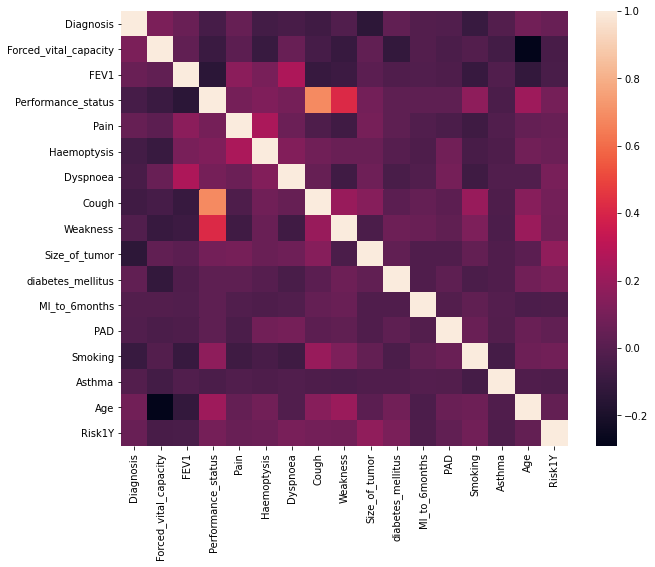

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(Dataset.corr())
plt.show()

Видно некоторую корреляцию у состояния пациента и наблюдаемым у него перед операцией симптомам в виде кашля и слабости. 

Отрицательная корреляция выявлена между тестом FVC (Forced vital capacity) с возрастом пациента. FVC - это тест, в котором пациент выдыхает максимально возможное количество воздуха после максимально глубокого вдоха.

##Создание алгоритмов и их тестирование

Прежде всего, выделим наш целевой признак в отдельную переменную 

In [60]:
X = Dataset.drop(columns='Diagnosis')
y = Dataset.Diagnosis

Разделим их на тренировочную и тестовую выборки, используя специальный для этого метод из библиотеки sklearn

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15)

Далее попробуем построить простую модель, например kNN, и посмотрим на её результативность.

### kNN

Импортируем нужные для алгоритма kNN методы из библиотеки sklearn

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Инициализируем функцию для отрисовки графика результативности модели в зависимости от подставляемого параметра k соседей

In [63]:
def grid_plot(x, y, title, y_label = 'accuracy', x_label = 'n_neighbors'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)


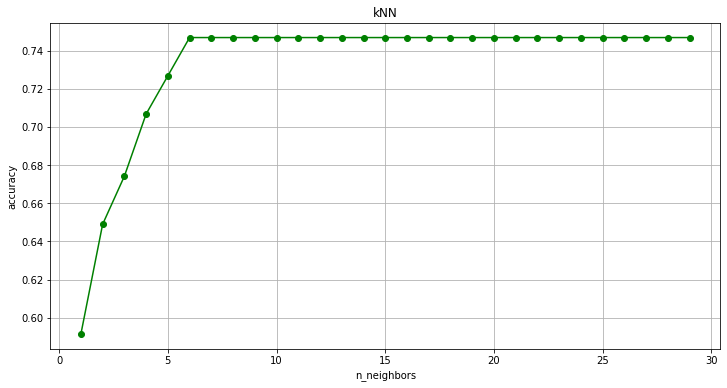

In [64]:
knn = KNeighborsClassifier()
knn_search = GridSearchCV(knn, {'n_neighbors': np.arange(1,30)}, cv=4)
knn_search.fit(X_train, y_train)
grid_plot(np.arange(1,30), knn_search.cv_results_['mean_test_score'],'kNN')

Мы видим, что в значениях n_neighbors после 9 линия становится прямой, то есть увеличивающееся количество соседей не влияет на точность модели дальше значения 9. Теперь используем этот параметр для получения предсказаний на тестовой выборке. Я вызову метод predict от обученного GridSearchCV, так как этот метод использует по умолчанию наилучший найденный параметр.

In [65]:
from sklearn.metrics import classification_report
knn_test_predictions = knn_search.predict(X_test)
print(classification_report(y_test,knn_test_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.71      0.96      0.82        51
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.69        71
   macro avg       0.12      0.16      0.14        71
weighted avg       0.51      0.69      0.59        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Мы видим, что модель не может определить ни один класс, кроме мажорного. Это безусловно связано с несбалансированностью данных, а именно очень малым количеством наблюдений остальных классов в датасете. Дальше в ноутбуке мы снова опробуем этот алгоритм после балансировки классов, а пока посмотрим на работу другого алгоритма - логистической регрессии.

### Logistic regression

Импортируем алгоритм Логистической регрессии из библиотеки sklearn

In [66]:
from sklearn.linear_model import LogisticRegression

С помощью GridSearchCV, который уже был использован в алгоритме kNN я попробую подобрать наиболее подходящие параметры алгоритма

In [67]:
LR_search = GridSearchCV(LogisticRegression(solver='liblinear'), {'C': np.linspace(1,50,100), 'penalty': ['l1','l2']})
LR_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1.        ,  1.494949...
       38.12121212, 38.61616162, 39.11111111, 39.60606061, 40.1010101 ,
       40.5959596 , 41.09090909, 41.58585859, 42.08080808, 42.57575758,
       43.07070707, 43.56565657, 44.06060606, 44.55555556, 45.05050505,
       45.54545455, 46.04040404, 46.53535354, 47.03030303, 47.5252

In [68]:
print(LR_search.best_params_, LR_search.best_score_)

{'C': 1.494949494949495, 'penalty': 'l1'} 0.7468670886075949


Мы видим, что наиболее подходящие параметры 'C'=1 и 'penalty'='l1'. Эти параметры стоят в алгоритме по умолчанию. Теперь имплементируем алгоритм. Я изменил значение параметра solver на 'liblinear', потому что данное значение рекомендовано для небольших датасетов.

In [69]:
LR = LogisticRegression(solver='liblinear', penalty='l1')
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Посмотрим на результат работы алгоритма. Используем метрики алгоритма регрессии $R^2 score$ и MAE.

In [70]:
from sklearn.metrics import mean_absolute_error, r2_score
LR_predictions = LR.predict(X_test)
print(" MAE score:", mean_absolute_error(y_test, LR_predictions), 
      '\n',
      "R2 score:", r2_score(y_test,LR_predictions))

 MAE score: 0.36619718309859156 
 R2 score: -0.020915032679738932


Как и в случае с kNN, результаты совершенно никуда не годятся. Перепроверим на на функции classification_report

In [71]:
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.72      1.00      0.84        51
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.72        71
   macro avg       0.12      0.17      0.14        71
weighted avg       0.52      0.72      0.60        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результат аналогичен kNN. Минорные классы также игнорируются

### Naive Bayes

Посмотрим теперь, как с этими данными справится другой алгоритм классификации - Naive Bayes. Из разных вариантов этого алгоритма я выберу CategoricalNB, так как большая часть наших признаков категориальные.

#### Categoriical NB

In [72]:
from sklearn.naive_bayes import CategoricalNB

In [73]:
Categorical_bayes = CategoricalNB()
Categorical_bayes.fit(X_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
print(classification_report(y_test, Categorical_bayes.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.72      1.00      0.84        51
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.72        71
   macro avg       0.12      0.17      0.14        71
weighted avg       0.52      0.72      0.60        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


В отличии от kNN наивный Байесовский классификатор смог отличить несколько экземпляров минорного класса. Похоже, что он сработал немного лучше остальных алгоритмов.

Однако же, в библиотеке реализован не один Байесовский классификатор, попробуем посмотреть на результаты работы других. Следующий алгоритм - Complement Байесевский классификатор.



#### Complement NB

In [75]:
from sklearn.naive_bayes import ComplementNB
Comp_NB = ComplementNB()
Comp_NB.fit(X_train,y_train)
print(classification_report(y_test, Comp_NB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.72      0.96      0.82        51
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.69        71
   macro avg       0.12      0.16      0.14        71
weighted avg       0.52      0.69      0.59        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результат похож на CategoriaclNB.

### Decision Tree

Другая разновидность простых алгоритмов классификации - дерево решений. Посмотрим на результат

In [76]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)
Tree_predictions = Tree.predict(X_test)
print(classification_report(y_test, Tree_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.71      0.76      0.74        51
           3       0.25      0.11      0.15         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.56        71
   macro avg       0.14      0.13      0.13        71
weighted avg       0.54      0.56      0.55        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результат очень слабый, как и с предыдущими алгоритмами.

Теперь используем сложный алгоритм классификации - градиентный бустинг.


### CatBoost Classifier

Библиотека CatBoost не предустановлена по умолчанию, нам нужно будет использовать команду pip install

In [77]:
!pip install catboost

     |████████████████████████████████| 65.8MB 60kB/s 


Теперь импортируем библиотеку catboost

In [80]:
import catboost

Обучаем наш алгоритм градиентного бустинга

In [82]:
Kitty = catboost.CatBoostClassifier()
Kitty.fit(X_test, y_test)

Learning rate set to 0.069141
0:	learn: 1.7055356	total: 1.37ms	remaining: 1.37s
1:	learn: 1.6511951	total: 6.73ms	remaining: 3.36s
2:	learn: 1.6037411	total: 11.6ms	remaining: 3.85s
3:	learn: 1.5631090	total: 16.2ms	remaining: 4.04s
4:	learn: 1.5246642	total: 20.8ms	remaining: 4.14s
5:	learn: 1.4795621	total: 25.6ms	remaining: 4.23s
6:	learn: 1.4384257	total: 30.4ms	remaining: 4.31s
7:	learn: 1.3985122	total: 33.1ms	remaining: 4.1s
8:	learn: 1.3615944	total: 38.3ms	remaining: 4.21s
9:	learn: 1.3201406	total: 39.2ms	remaining: 3.88s
10:	learn: 1.2794363	total: 39.8ms	remaining: 3.58s
11:	learn: 1.2583195	total: 44.6ms	remaining: 3.67s
12:	learn: 1.2363318	total: 49.2ms	remaining: 3.73s
13:	learn: 1.2057575	total: 53.8ms	remaining: 3.79s
14:	learn: 1.1820361	total: 58.3ms	remaining: 3.83s
15:	learn: 1.1601864	total: 62.4ms	remaining: 3.84s
16:	learn: 1.1396761	total: 66.7ms	remaining: 3.85s
17:	learn: 1.1202165	total: 69.2ms	remaining: 3.77s
18:	learn: 1.1038165	total: 73.1ms	remaining:

Посмотрим на результат

In [83]:
Kitty_predictions = Kitty.predict(X_test)
print(classification_report(y_test, Kitty_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



Распознаны все экземпляры каждого класса! Это невероятный результат, особенно если сравнивать с результатом предыдущих алгоритмов. Посмотрим на то, какие параметры больше всего влияют на нашу модель

In [104]:
Kitty.get_feature_importance(data=None,
                             prettified=True,
                             thread_count=-1,
                             verbose=False)   

,Feature Id,Importances
0,Age,21.576955
1,Forced_vital_capacity,18.243142
2,FEV1,14.266531
3,Size_of_tumor,10.950228
4,Performance_status,8.460162
5,Risk1Y,8.035584
6,Smoking,6.216643
7,Cough,6.128385
8,Weakness,3.383610
9,Haemoptysis,1.183050


## Оверсэмплинг

Мы снова возвращаемся к нашему датасету. Используя алгоритмы в предыдущем разделе мы получили в большинстве случаев очень слабый результат, так как алгоритм не мог обучиться на выборке с невыраженными минорными классами. Сейчас мы используем метод оверсэмплинга SMOTE, чтобы облегчить задачу алгоритму.

In [35]:
from imblearn.over_sampling import SMOTENC

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Я выбрал не стандартный SMOTE, а SMOTENC (nominal & continious), так как он предназначен для работы как с числовыми признаками, так и с категориальными. Однако, категориальные данные нам необходимо использовать в исходном формате, чтобы при добавлении новых образцов метод SMOTENC не генерировал значения, похожие на 0,5 в столбцах, где оригинальный датасет принимает значения только 1 и 0. Поэтому начнём с нашего изначального датасета.

In [36]:
Raw_dataset.head()

,id,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


Снова удалим столбец id - он не несёт информации


In [37]:
Raw_dataset = Raw_dataset.drop(columns='id')
Raw_dataset.head()

,Diagnosis,Forced_vital_capacity,FEV1,Performance_status,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Size_of_tumor,diabetes_mellitus,MI_to_6months,PAD,Smoking,Asthma,Age,Risk1Y
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


Выделим новые матрицу признаков и целевую переменную X и y. Затем разобъём на обучающую и тестовую выборки по уже использующейся у нас функции.

In [38]:
Raw_X = Raw_dataset.drop(columns='Diagnosis')
Raw_y = Raw_dataset.Diagnosis

In [39]:
Train_raw_x, Test_raw_x, Train_raw_y, Test_raw_y = train_test_split(Raw_X, Raw_y)

Теперь имплементируем алгоритм оверсэмплинга


In [40]:
cat_columns = ['Diagnosis', 
              'Performance_status', 
              'Pain', 
              'Haemoptysis',
              'Dyspnoea',
              'Cough',
              'Weakness',
              'Size_of_tumor',
              'diabetes_mellitus',
              'MI_to_6months',
              'PAD',
              'Smoking',
              'Asthma',
              'Risk1Y']